In [8]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP

rl = True
save_plots = False
'''
ws_analysis_checkpoint_ff_sag_vs_dag_dyn_test31000 # the first analysis I did between S6 and ART
ws_analysis_checkpoint_ff_ctgrtg_S6_vs_dag_dyn_test20000 # the first analysis I did between S6 and ART WITH smaller data size
wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S6_gsa_test2000 # the second anlysis for my presenta wuth marco
wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S4_gsa_test2000 # FOR S4D
'''
modeltype = 'gsa'
############# S6
# traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting/ws_analysis_checkpoint_ff_ctgrtg_art_vs_dag_dyn_test9000.npz')
if modeltype == 'gsa':    
    traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting/wsF_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S6_gsa_test2000.npz')
else:
    traj_data = np.load(root_folder + '/optimization/saved_files/warmstarting_S6FULL/wsF_analysis_checkpoint_ff_ctgrtg_art_vs_checkpoint_ff_S6_rcgsa_test2000.npz')



n = len(traj_data['test_dataset_ix'])#20001#
n = 2000
J_vect_scp_cvx = traj_data['J_vect_scp_cvx'][:n]
J_vect_scp_DT =  traj_data['J_vect_scp_DT'][:n]
# J_vect_scp_dag =  traj_data['J_vect_scp_dag'][:n]
J_vect_scp_S6 = traj_data['J_vect_scp_S6'][:n]
J_cvx =  traj_data['J_cvx'][:n]
J_DT =  traj_data['J_DT'][:n]
# J_dag =  traj_data['J_dag'][:n]
J_S6 = traj_data['J_S6'][:n]
iter_scp_cvx =  traj_data['iter_scp_cvx'][:n]
iter_scp_DT =  traj_data['iter_scp_DT'][:n]
# iter_scp_dag =  traj_data['iter_scp_dag'][:n]
iter_scp_S6 = traj_data['iter_scp_S6'][:n]
runtime_cvx =  traj_data['runtime_cvx'][:n]
runtime_DT =  traj_data['runtime_DT'][:n]
# runtime_dag = traj_data['runtime_dag'][:n]
runtime_S6 = traj_data['runtime_S6'][:n]
runtime_scp_cvx =  traj_data['runtime_scp_cvx'][:n]
runtime_scp_DT =  traj_data['runtime_scp_DT'][:n]
# runtime_scp_dag =  traj_data['runtime_scp_dag'][:n]
runtime_scp_S6 = traj_data['runtime_scp_S6'][:n]
ctgs0_cvx =  traj_data['ctgs0_cvx'][:n]
cvx_problem =  traj_data['cvx_problem'][:n]
test_dataset_ix =  np.arange(len(traj_data['test_dataset_ix'][:n]))
i_unfeas_cvx =  traj_data['i_unfeas_cvx'][traj_data['i_unfeas_cvx'] <= n]
i_unfeas_scp_cvx =  traj_data['i_unfeas_scp_cvx'][traj_data['i_unfeas_scp_cvx'] <= n]
i_unfeas_DT =  traj_data['i_unfeas_DT'][traj_data['i_unfeas_DT'] <= n]
# i_unfeas_scp_dag =  traj_data['i_unfeas_scp_dag'][:n]
i_unfeas_S6 = traj_data['i_unfeas_S6'][traj_data['i_unfeas_S6'] <= n]
x_init = traj_data['state_init']
x_final = traj_data['state_final']
print(n)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer']
2000


In [9]:
# total unfeasible problem given by CVX
# total unfeasible problem given by SSM
# total unfeasible problem given by ART
print('CVX', len(i_unfeas_scp_cvx)/n*100)
print('SSM',len(i_unfeas_S6)/n*100)
print('ART',len(i_unfeas_DT)/n*100)


CVX 14.000000000000002
SSM 13.3
ART 0.75


In [10]:
set_unf_scp_cvx = set(i_unfeas_scp_cvx)
set_unf_scp_DT = set(i_unfeas_DT)
set_unf_scp_S6 = set(i_unfeas_S6)
i_unfeas_cvx_DT = list(set_unf_scp_cvx - set_unf_scp_DT)
i_unfeas_cvx_S6 = list(set_unf_scp_cvx - set_unf_scp_S6)


In [11]:
x_init_infeas_scp_cvx = x_init[i_unfeas_scp_cvx]
x_init_infeas_scp_DT = x_init[i_unfeas_DT]
x_init_infeas_scp_S6 = x_init[i_unfeas_S6]
x_final_infeas_scp_cvx = x_final[i_unfeas_scp_cvx]
x_final_infeas_scp_DT = x_final[i_unfeas_DT]
x_final_infeas_scp_S6 = x_final[i_unfeas_S6]

In [12]:
unfeas_lines = np.concatenate((x_init_infeas_scp_cvx[:,:,None], x_final_infeas_scp_cvx[:,:,None]), axis=2)
unfeas_lines_DT = np.concatenate((x_init_infeas_scp_DT[:,:,None], x_final_infeas_scp_DT[:,:,None]), axis=2)
unfeas_lines_S6 = np.concatenate((x_init_infeas_scp_S6[:,:,None], x_final_infeas_scp_S6[:,:,None]), axis=2)

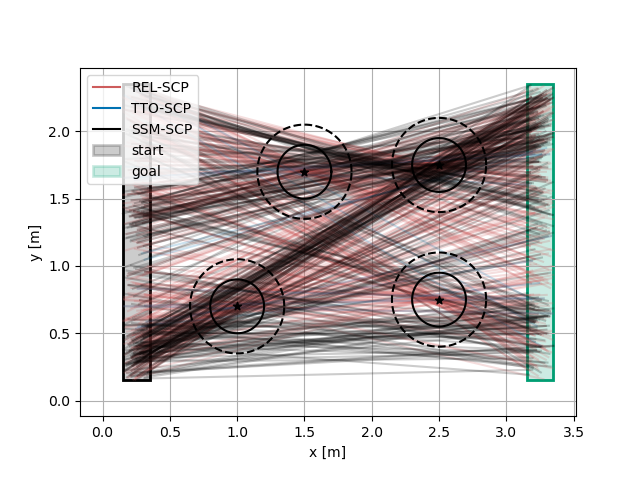

In [13]:
%matplotlib ipympl
from matplotlib.patches import Circle, Rectangle
plt.style.use('seaborn-v0_8-colorblind')
plt.figure()
dim1 = 0
dim2 = 1
ax = plt.axes()#projection='3d')
#ax.scatter3D(x_init_infeas_scp_cvx[:,0],x_init_infeas_scp_cvx[:,1],x_init_infeas_scp_cvx[:,2])
ax.plot(unfeas_lines[:,dim1,:].T, unfeas_lines[:,dim2,:].T, c='indianred', alpha=0.2)#, unfeas_lines[:,2,:].T)
ax.plot(unfeas_lines_DT[:,dim1,:].T, unfeas_lines_DT[:,dim2,:].T, c='C0', alpha=0.2)
ax.plot(unfeas_lines_S6[:,dim1,:].T, unfeas_lines_S6[:,dim2,:].T, c='black', alpha=0.2)
ax.plot(0, 0, c='indianred', label='REL-SCP')
ax.plot(0, 0, c='C0', label='TTO-SCP')
ax.plot(0, 0, c='black', label='SSM-SCP')
ax.add_patch(Rectangle(start_region['xy_low'], start_region['xy_up'][0] - start_region['xy_low'][0], start_region['xy_up'][1] - start_region['xy_low'][1], fc ='none', ec ='black', alpha=1., lw = 2, zorder=1))
ax.add_patch(Rectangle(goal_region['xy_low'], goal_region['xy_up'][0] - goal_region['xy_low'][0], goal_region['xy_up'][1] - goal_region['xy_low'][1], fc ='none', ec ='C1', alpha=1., lw = 2, zorder=1))
ax.add_patch(Rectangle(start_region['xy_low'], start_region['xy_up'][0] - start_region['xy_low'][0], start_region['xy_up'][1] - start_region['xy_low'][1], fc ='black', ec ='black', alpha=0.2, lw = 2, zorder=1, label='start'))
ax.add_patch(Rectangle(goal_region['xy_low'], goal_region['xy_up'][0] - goal_region['xy_low'][0], goal_region['xy_up'][1] - goal_region['xy_low'][1], fc ='C1', ec ='C1', alpha=0.2, lw = 2, zorder=1, label='goal')) 
ax.set_aspect('equal')
for i in range(n_obs):
    p = obs['position'][i]
    r = obs['radius'][i]
    r_plus = (obs['radius'][i] + robot_radius)
    ax.scatter(p[dim1],p[dim2],marker='*',color='k', zorder=3)
    ax.plot(p[dim1]+r*np.cos(np.linspace(0,2*np.pi,100)), p[dim2]+r*np.sin(np.linspace(0,2*np.pi,100)), c='k', zorder=4)
    ax.plot(p[dim1]+r_plus*np.cos(np.linspace(0,2*np.pi,100)), p[dim2]+r_plus*np.sin(np.linspace(0,2*np.pi,100)), 'k--', zorder=4)
ax.grid(True)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.legend(loc='upper left')
plt.show()

In [14]:
####### Full feasible nncvx testset analysis
# Identify wrong optimization cases
wrong_opt_cases = np.min(J_vect_scp_cvx, axis=1) > 200

# Collect all infeasible cases from SCP-CVX, DT, S6, and wrong optimization cases
i_unfeas2 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_DT)).union(set(i_unfeas_S6)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))

# Add cases where CVX reported a problem
i_unfeas_plus_cvx = list(set(i_unfeas2).union(set(np.rint(test_dataset_ix[cvx_problem]).astype(int))))
i_unfeas_plus_cvx = [i for i in i_unfeas_plus_cvx if i < len(ctgs0_cvx)]

print("Size of ctgs0_cvx:", len(ctgs0_cvx))
print("Max index in i_unfeas_plus_cvx:", max(i_unfeas_plus_cvx))
# wrong_opt_cases = np.min(J_vect_scp_cvx, axis=1) > 200
# i_unfeas2 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_DT)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))
# # i_unfeas3 = list(set(i_unfeas_scp_cvx).union(set(i_unfeas_S6)).union(set(np.rint(test_dataset_ix[wrong_opt_cases]).astype(int))))
# i_unfeas = i_unfeas2
# i_unfeas_plus_cvx = list(set(i_unfeas).union(set(np.rint(test_dataset_ix[cvx_problem]).astype(int))))

# removing all the unfeasible traj solutions from the data
ctgs0_cvx_feas = np.delete(ctgs0_cvx, i_unfeas_plus_cvx, axis=0)
J_vect_scp_cvx_feas = np.delete(J_vect_scp_cvx, i_unfeas_plus_cvx, axis=0)
J_vect_scp_DT_feas = np.delete(J_vect_scp_DT, i_unfeas_plus_cvx, axis=0)
J_vect_scp_S6_feas = np.delete(J_vect_scp_S6, i_unfeas_plus_cvx, axis=0)
J_cvx_feas = np.delete(J_cvx, i_unfeas_plus_cvx, axis=0)
J_DT_feas = np.delete(J_DT, i_unfeas_plus_cvx, axis=0)
J_S6_feas = np.delete(J_S6, i_unfeas_plus_cvx, axis=0)
iter_scp_cvx_feas = np.delete(iter_scp_cvx, i_unfeas_plus_cvx, axis=0)
iter_scp_DT_feas = np.delete(iter_scp_DT, i_unfeas_plus_cvx, axis=0)
iter_scp_S6_feas = np.delete(iter_scp_S6, i_unfeas_plus_cvx, axis=0)
runtime_cvx_feas = np.delete(runtime_cvx, i_unfeas_plus_cvx, axis=0)
runtime_scp_cvx_feas = np.delete(runtime_scp_cvx, i_unfeas_plus_cvx, axis=0)
runtime_DT_feas = np.delete(runtime_DT, i_unfeas_plus_cvx, axis=0)
runtime_S6_feas = np.delete(runtime_S6, i_unfeas_plus_cvx, axis=0)
runtime_scp_DT_feas = np.delete(runtime_scp_DT, i_unfeas_plus_cvx, axis=0)
runtime_scp_S6_feas = np.delete(runtime_scp_S6, i_unfeas_plus_cvx, axis=0)

print('Full feasible nncvx testset analysis. Test dataset size: ', len(ctgs0_cvx_feas))

J_min_scp_cvx_feas = np.min(J_vect_scp_cvx_feas, axis=1) # final converged cost at the end of optimization solution
J_min_scp_DT_feas = np.min(J_vect_scp_DT_feas, axis=1)
J_min_scp_S6_feas = np.min(J_vect_scp_S6_feas, axis=1)

J_scp_gain_mean_DT = np.mean(J_min_scp_cvx_feas - J_min_scp_DT_feas)
J_scp_gain_std_DT = np.std(J_min_scp_cvx_feas - J_min_scp_DT_feas)
print('J_scp_gain_mean_DT:', J_scp_gain_mean_DT, 'J_scp_gain_std_DT:', J_scp_gain_std_DT)
J_scp_gain_mean = np.mean(J_min_scp_cvx_feas - J_min_scp_S6_feas)
J_scp_gain_std = np.std(J_min_scp_cvx_feas - J_min_scp_S6_feas)
print('J_scp_gain_mean_S6:', J_scp_gain_mean, 'J_scp_gain_std_S6:', J_scp_gain_std)

# Percentage Calculation
J_scp_gain_mean_perc_DT = np.mean((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('idx max cost perc improvement DT: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)]])
J_scp_gain_mean_perc_S6 = np.mean((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
print('idx max cost perc improvement S6: ', test_dataset_ix[J_cvx==J_cvx_feas[np.argmax((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)]])

# Indexes of best trajectories with respect to assumption that we achived lower loss for our model compared to cvx relaxation
ix_sort_DT = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas)
print('First ten i with maximum cost perc improvement DT: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort_DT][:10])])
ix_sort = np.argsort(-(J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas)
print('First ten i with maximum cost perc improvement S6: ', test_dataset_ix[np.isin(J_cvx, J_cvx_feas[ix_sort][:10])])

J_scp_gain_std_perc_DT = np.std((J_min_scp_cvx_feas - J_min_scp_DT_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc DT: ', J_scp_gain_mean_perc_DT, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc_DT)
J_scp_gain_std_perc = np.std((J_min_scp_cvx_feas - J_min_scp_S6_feas)/J_min_scp_cvx_feas*100)
print('J_scp_gain_mean_perc S6: ', J_scp_gain_mean_perc_S6, ' J_scp_gain_std_perc: ', J_scp_gain_std_perc)

iter_scp_mean_cvx = np.mean(iter_scp_cvx_feas)
iter_scp_mean_DT = np.mean(iter_scp_DT_feas)
iter_scp_mean_S6 = np.mean(iter_scp_S6_feas)
iter_scp_gain_mean_DT = np.mean(iter_scp_cvx_feas - iter_scp_DT_feas)
iter_scp_gain_std_DT = np.std(iter_scp_cvx_feas - iter_scp_DT_feas)
print('iter_gain_mean DT: ', iter_scp_gain_mean_DT, ' iter_gain_std DT: ', iter_scp_gain_std_DT)
iter_scp_gain_meanS6 = np.mean(iter_scp_cvx_feas - iter_scp_S6_feas)
iter_scp_gain_stdS6 = np.std(iter_scp_cvx_feas - iter_scp_S6_feas)
print('iter_gain_mean S6: ', iter_scp_gain_meanS6, ' iter_gain_std S6: ', iter_scp_gain_stdS6)
print('iter_scp_mean_cvx: ', iter_scp_mean_cvx, ' iter_scp_mean_S6 : ', iter_scp_mean_S6,' iter_scp_mean_DT : ', iter_scp_mean_DT)

runtime_scp_mean_cvx = np.mean(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_mean_DT = np.mean(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_mean_S6 = np.mean(runtime_S6_feas + runtime_scp_S6_feas)

runtime_scp_std_cvx = np.std(runtime_cvx_feas + runtime_scp_cvx_feas)
runtime_scp_std_DT = np.std(runtime_DT_feas + runtime_scp_DT_feas)
runtime_scp_std_S6 = np.std(runtime_S6_feas + runtime_scp_S6_feas)

runtime_gain_meanDT = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_stdDT = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_DT_feas + runtime_scp_DT_feas))
runtime_gain_meanS6 = np.mean((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
runtime_gain_stdS6 = np.std((runtime_cvx_feas + runtime_scp_cvx_feas) - (runtime_S6_feas + runtime_scp_S6_feas))
print('runtime_gain_mean DT: ', runtime_gain_meanDT, ' runtime_gain_std DT: ', runtime_gain_stdDT)
print('runtime_gain_mean S6: ', runtime_gain_meanS6, ' runtime_gain_std S6: ', runtime_gain_stdS6)
print('runtime_ws_mean_cvx: ', np.mean(runtime_cvx_feas), ' runtime_ws_mean_S6: ', np.mean(runtime_S6_feas), ' runtime_ws_mean_DT: ', np.mean(runtime_DT_feas))
print('runtime_scp_mean_cvx: ', runtime_scp_mean_cvx, ' runtime_scp_mean_S6: ', runtime_scp_mean_S6, ' runtime_scp_mean_DT: ', runtime_scp_mean_DT)
print('runtime_ws_std_cvx: ', np.std(runtime_cvx_feas), ' runtime_ws_std_S6: ', np.std(runtime_S6_feas), ' runtime_ws_std_DT: ', np.std(runtime_DT_feas))
print('runtime_scp_std_cvx: ', runtime_scp_std_cvx, ' runtime_scp_std_S6: ', runtime_scp_std_S6, ' runtime_scp_std_DT: ', runtime_scp_std_DT)


ind_sort_J_cvx_feas = np.argsort(J_cvx_feas)
J_cvx_feas_sort = J_cvx_feas[ind_sort_J_cvx_feas]
perc_opt_loss_DT = (J_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_S6 = (J_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_cvx = (J_min_scp_cvx_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_DT  = (J_min_scp_DT_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100
perc_opt_loss_scp_S6  = (J_min_scp_S6_feas[ind_sort_J_cvx_feas]-J_cvx_feas_sort)/J_cvx_feas_sort*100

ind_sort_ctgs0_cvx = np.argsort(ctgs0_cvx_feas)
ctgs0_cvx_sort = ctgs0_cvx_feas[ind_sort_ctgs0_cvx]
perc_opt_loss_DT_ctgs = (J_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_S6_ctgs = (J_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_cvx_ctgs = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100
perc_opt_loss_scp_DT_ctgs = (J_min_scp_DT_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100  
perc_opt_loss_scp_S6_ctgs = (J_min_scp_S6_feas[ind_sort_ctgs0_cvx] - J_cvx_feas[ind_sort_ctgs0_cvx]) / J_cvx_feas[ind_sort_ctgs0_cvx] * 100


perc_cost_gain_ctgsDT = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_DT_feas[ind_sort_ctgs0_cvx])/J_min_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_cost_gain_ctgsS6 = (J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] - J_min_scp_S6_feas[ind_sort_ctgs0_cvx]) / J_min_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100
iter_gain_ctgsDT = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_DT_feas[ind_sort_ctgs0_cvx])
iter_gain_ctgsS6 = (iter_scp_cvx_feas[ind_sort_ctgs0_cvx] - iter_scp_S6_feas[ind_sort_ctgs0_cvx])
perc_runtime_gain_ctgsDT = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_DT_feas[ind_sort_ctgs0_cvx])/runtime_scp_cvx_feas[ind_sort_ctgs0_cvx]*100
perc_runtime_gain_ctgsS6 = (runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] - runtime_scp_S6_feas[ind_sort_ctgs0_cvx]) / runtime_scp_cvx_feas[ind_sort_ctgs0_cvx] * 100

Delta_J_mean_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # Original DT line
Delta_J_std_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
count_scp_DT = np.zeros(shape=(iter_max_SCP,), dtype=float)  # DT version
count_scp_S6 = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_cvx_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float) 
Delta_J_std_scp_DT_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_std_scp_S6_2_cvx = np.zeros(shape=(iter_max_SCP,), dtype=float)
Delta_J_mean_DT_2_cvx = np.mean((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_std_DT_2_cvx = np.std((J_DT_feas - J_cvx_feas)/J_cvx_feas)
Delta_J_mean_S6_2_cvx = np.mean((J_S6_feas - J_cvx_feas) / J_cvx_feas)
Delta_J_std_S6_2_cvx = np.std((J_S6_feas - J_cvx_feas) / J_cvx_feas)


for i in range(iter_max_SCP):
    mask_scp_cvx_i = J_vect_scp_cvx_feas[:,i] > 1e10
    count_scp_cvx[i] = sum(~mask_scp_cvx_i)
    J_vect_scp_cvx_feas_i = J_vect_scp_cvx_feas[:,i].copy()
    J_vect_scp_cvx_feas_i[mask_scp_cvx_i] = J_min_scp_cvx_feas[mask_scp_cvx_i]
    Delta_J_mean_scp_cvx[i] = np.mean((J_vect_scp_cvx_feas_i-J_min_scp_cvx_feas)/J_min_scp_cvx_feas)
    Delta_J_std_scp_cvx[i] = np.std((J_vect_scp_cvx_feas_i-J_min_scp_cvx_feas)/J_min_scp_cvx_feas)
    Delta_J_mean_scp_cvx_2_cvx[i] = np.mean((J_vect_scp_cvx_feas_i-J_cvx_feas)/J_cvx_feas)
    Delta_J_std_scp_cvx_2_cvx[i] = np.std((J_vect_scp_cvx_feas_i-J_cvx_feas)/J_cvx_feas)
    mask_scp_DT_i = J_vect_scp_DT_feas[:,i] > 1e10
    count_scp_DT[i] = sum(~mask_scp_DT_i)
    
    mask_scp_S6_i = J_vect_scp_S6_feas[:,i] > 1e10
    count_scp_S6[i] = sum(~mask_scp_S6_i)

    J_vect_scp_DT_feas_i = J_vect_scp_DT_feas[:,i].copy()
    J_vect_scp_DT_feas_i[mask_scp_DT_i] = J_min_scp_DT_feas[mask_scp_DT_i]
    Delta_J_mean_scp_DT[i] = np.mean((J_vect_scp_DT_feas_i-J_min_scp_DT_feas)/J_min_scp_DT_feas)
    Delta_J_std_scp_DT[i] = np.std((J_vect_scp_DT_feas_i-J_min_scp_DT_feas)/J_min_scp_DT_feas)
    Delta_J_mean_scp_DT_2_cvx[i] = np.mean((J_vect_scp_DT_feas_i-J_cvx_feas)/J_cvx_feas)
    Delta_J_std_scp_DT_2_cvx[i] = np.std((J_vect_scp_DT_feas_i-J_cvx_feas)/J_cvx_feas)

    J_vect_scp_S6_feas_i = J_vect_scp_S6_feas[:, i].copy()
    J_vect_scp_S6_feas_i[mask_scp_S6_i] = J_min_scp_S6_feas[mask_scp_S6_i]
    Delta_J_mean_scp_S6[i] = np.mean((J_vect_scp_S6_feas_i - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_std_scp_S6[i] = np.std((J_vect_scp_S6_feas_i - J_min_scp_S6_feas) / J_min_scp_S6_feas)
    Delta_J_mean_scp_S6_2_cvx[i] = np.mean((J_vect_scp_S6_feas_i - J_cvx_feas) / J_cvx_feas)
    Delta_J_std_scp_S6_2_cvx[i] = np.std((J_vect_scp_S6_feas_i - J_cvx_feas) / J_cvx_feas)


Size of ctgs0_cvx: 2000
Max index in i_unfeas_plus_cvx: 1995
Full feasible nncvx testset analysis. Test dataset size:  1412
J_scp_gain_mean_DT: -0.0007239142660408062 J_scp_gain_std_DT: 0.023842529190915777
J_scp_gain_mean_S6: -0.006465816311053868 J_scp_gain_std_S6: 0.03194149470488329
idx max cost perc improvement DT:  [32]
idx max cost perc improvement S6:  [32]
First ten i with maximum cost perc improvement DT:  [  32  339  727  758 1223 1285 1292 1739 1746 1909]
First ten i with maximum cost perc improvement S6:  [  32  215  368  396  538  812 1444 1667 1687 1838]
J_scp_gain_mean_perc DT:  -0.4721693828534773  J_scp_gain_std_perc:  7.757851682642741
J_scp_gain_mean_perc S6:  -2.6084590219563895  J_scp_gain_std_perc:  12.013418221364558
iter_gain_mean DT:  1.2259206798866855  iter_gain_std DT:  2.0803497375526825
iter_gain_mean S6:  -1.6990084985835694  iter_gain_std S6:  2.9911435149186594
iter_scp_mean_cvx:  4.458923512747876  iter_scp_mean_S6 :  6.157932011331445  iter_scp_mean_

Full feasible nncvx testset analysis. Test dataset size:  30630
J_scp_gain_mean: 0.004368524168710465 J_scp_gain_std: 0.012828212221844293
idx max cost perc improvement:  [14286]
First ten i with maximum cost perc improvement:  [  736  1412  1428  1540  7186 10657 14286 15726 16217 34366]
J_scp_gain_mean_perc:  2.813796651509516  J_scp_gain_std_perc:  8.381901787193971
iter_gain_mean:  -0.6721841332027424  iter_gain_std:  3.1950592411931193
iter_scp_mean_cvx:  5.822853411687888  iter_scp_mean_DT :  6.49503754489063
runtime_gain_mean:  1.84158255186028  runtime_gain_std:  5.388511283965771
runtime_scp_mean_cvx:  13.956262769210273  runtime_scp_mean_DT:  12.114680217349992

In [15]:
test_dataset_ix_feas = np.delete(test_dataset_ix, i_unfeas_plus_cvx, axis=0)
test_dataset_ix_feasDT = test_dataset_ix_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()]
test_dataset_ix_feasS6 = test_dataset_ix_feas[iter_scp_cvx_feas - iter_scp_S6_feas == (iter_scp_cvx_feas - iter_scp_S6_feas).min()]

In [16]:
# print(len(i_unfeas_plus_cvx))
# x_init_feas = np.delete(x_init, i_unfeas_plus_cvx, axis=0)
# x_final_feas = np.delete(x_final, i_unfeas_plus_cvx, axis=0)
# print(len(iter_scp_cvx_feas))
# x_init_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()], x_final_feas[iter_scp_cvx_feas - iter_scp_DT_feas == (iter_scp_cvx_feas - iter_scp_DT_feas).min()]
# # x_init_feas[iter_scp_cvx_feas - iter_scp_S6_feas == (iter_scp_cvx_feas - iter_scp_S6_feas).min()], x_final_feas[iter_scp_cvx_feas - iter_scp_S6_feas == (iter_scp_cvx_feas - iter_scp_S6_feas).min()]

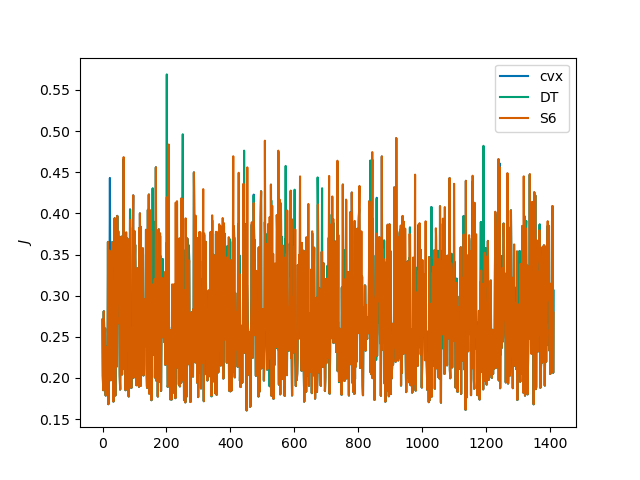

In [17]:
plt.figure()
plt.plot(J_min_scp_cvx_feas, label = 'cvx')
plt.plot(J_min_scp_DT_feas, label = 'DT')
plt.plot(J_min_scp_S6_feas, label = 'S6')
plt.ylabel(r'$J$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Testset analysis as function of CTGS0.
CTGS0 >  0  . Test dataset size:  1509
J_scp_gain_mean_ctgs_0:  -2.433120643200112 J_scp_gain_std_ctgs_0:  11.640276642026649
J_scp_gain2_mean_ctgs_0:  -2.433120643200112
J_scp_percloss_cvx_mean_ctgs_0:  29.712581067071884 J_scp_percloss_cvx_std_ctgs_0:  23.131288646617445
J_scp_percloss_S6_mean_ctgs_0:  32.674292037383864 J_scp_percloss_S6_std_ctgs_0:  26.61952185475724
J_scp_percloss_DT_mean_ctgs_0:  30.23497276002773 J_scp_percloss_DT_std_ctgs_0:  25.270311213753626
iter_gain_mean_0:  -1.6673293571901922  iter_gain_std_0:  2.897978013284453
iter_scp_mean_cvx_0:  4.236580516898608  iter_scp_std_cvx_0:  2.5443111813064205
iter_scp_mean_S6_0:  5.903909874088801  iter_scp_std_S6_0:  3.605373624741918
iter_scp_mean_DT_0:  3.149768058316766  iter_scp_std_DT_0:  1.9933874148210309
DTruntime_gain_mean_0:  2.409369002437655  DTruntime_gain_std_0:  2.0147788092416965
S6runtime_gain_mean_0:  -0.2915902030317889  S6runtime_gain_std_0:  2.789131473237976
ru

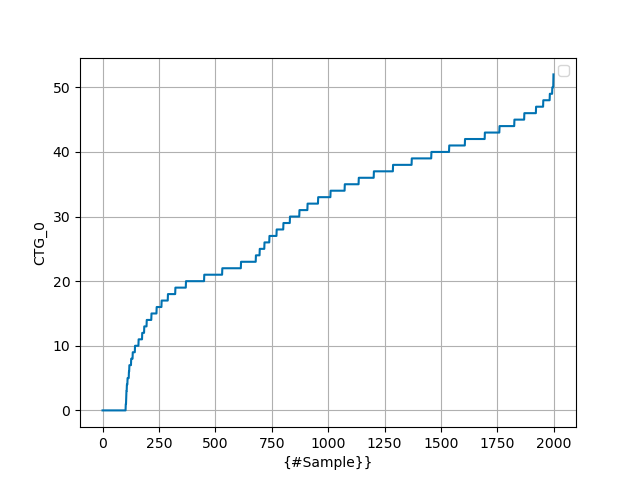

In [18]:
ctgs_range = range(0, 51, 1)
test_dataset_size = np.zeros(shape=(len(ctgs_range),), dtype=int)
J_scp_percgain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percgain2_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_cvx_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_S6_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_scp_percloss_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_scp_percloss_DT_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
iter_scp_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
iter_scp_gain_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
iter_scp_gain_std_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 

runtime_mean_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_scp_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_mean_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_mean_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
runtime_std_cvx_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_S6_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_std_DT_tot_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT
runtime_gain_mean_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsS6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
runtime_gain_mean_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 
runtime_gain_std_ctgsDT = np.zeros(shape=(len(ctgs_range),), dtype=float) 

J_relgain_scp_cvx_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_relgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT
J_percgain_scp_S6_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float) 
J_percgain_scp_DT_mean_ctgs = np.zeros(shape=(len(ctgs_range),), dtype=float)  # Added line for DT

n_unfeas_scp_cvx = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_S6 = np.zeros(shape=(len(ctgs_range),), dtype=float)
n_unfeas_scp_DT = np.zeros(shape=(len(ctgs_range),), dtype=float)    # Added line for DT

ctgxx = 1

print('Testset analysis as function of CTGS0.')

fig, ax1 = plt.subplots()
ax1.plot(sorted(ctgs0_cvx))
plt.legend(loc='best')
ax1.set_xlabel('{#Sample}}')
ax1.set_ylabel('CTG_0', color='k')
plt.grid(True)

iter = 0
for ctg in ctgs_range:

    i_ctg = list(set(np.rint(test_dataset_ix[ctgs0_cvx<ctg]).astype(int)))
    i_unfeas_plus_ctg = list(set(i_unfeas2).union(set(i_ctg)))

    ctgs0_cvx_feas_ctg = np.delete(ctgs0_cvx, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_cvx_feas_ctg = np.delete(J_vect_scp_cvx, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_S6_feas_ctg = np.delete(J_vect_scp_S6, i_unfeas_plus_ctg, axis=0)
    J_vect_scp_DT_feas_ctg = np.delete(J_vect_scp_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    J_cvx_feas_ctg = np.delete(J_cvx, i_unfeas_plus_ctg, axis=0)
    J_S6_feas_ctg = np.delete(J_S6, i_unfeas_plus_ctg, axis=0)
    J_DT_feas_ctg = np.delete(J_DT, i_unfeas_plus_ctg, axis=0)    # Added line for DT
    iter_scp_cvx_feas_ctg = np.delete(iter_scp_cvx, i_unfeas_plus_ctg, axis=0)
    iter_scp_S6_feas_ctg = np.delete(iter_scp_S6, i_unfeas_plus_ctg, axis=0)
    iter_scp_DT_feas_ctg = np.delete(iter_scp_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    runtime_cvx_feas_ctg = np.delete(runtime_cvx, i_unfeas_plus_ctg, axis=0)
    runtime_scp_cvx_feas_ctg = np.delete(runtime_scp_cvx, i_unfeas_plus_ctg, axis=0)
    runtime_S6_feas_ctg = np.delete(runtime_S6, i_unfeas_plus_ctg, axis=0)
    runtime_DT_feas_ctg = np.delete(runtime_DT, i_unfeas_plus_ctg, axis=0)  # Added line for DT
    runtime_scp_S6_feas_ctg = np.delete(runtime_scp_S6, i_unfeas_plus_ctg, axis=0)
    runtime_scp_DT_feas_ctg = np.delete(runtime_scp_DT, i_unfeas_plus_ctg, axis=0)

    if ctg == ctgxx:
        J_vect_scp_cvx_feas_ctgxx = J_vect_scp_cvx_feas_ctg
        J_vect_scp_S6_feas_ctgxx = J_vect_scp_S6_feas_ctg
        J_vect_scp_DT_feas_ctgxx = J_vect_scp_DT_feas_ctg    # Added line for DT
        J_cvx_feas_ctgxx = J_cvx_feas_ctg
        J_S6_feas_ctgxx = J_S6_feas_ctg
        J_DT_feas_ctgxx = J_DT_feas_ctg  # Added line for DT
        iter_scp_cvx_feas_ctgxx = iter_scp_cvx_feas_ctg
        iter_scp_S6_feas_ctgxx = iter_scp_S6_feas_ctg
        iter_scp_DT_feas_ctgxx = iter_scp_DT_feas_ctg  # Added line for DT

    test_dataset_size[iter] = len(ctgs0_cvx_feas_ctg)
    print('CTGS0 > ', ctg, ' . Test dataset size: ', test_dataset_size[iter])
    J_min_scp_cvx_feas_ctg = np.min(J_vect_scp_cvx_feas_ctg, axis=1)
    J_avg_scp_cvx_feas_ctg = J_min_scp_cvx_feas_ctg.mean()*1000.
    J_min_scp_S6_feas_ctg = np.min(J_vect_scp_S6_feas_ctg, axis=1)
    J_avg_scp_S6_feas_ctg = J_min_scp_S6_feas_ctg.mean()*1000.
    J_min_scp_DT_feas_ctg = np.min(J_vect_scp_DT_feas_ctg, axis=1)  # Added line for DT
    J_avg_scp_DT_feas_ctg = J_min_scp_DT_feas_ctg.mean()*1000.    # Added line for DT
    J_avg_cvx_feas_ctg = J_cvx_feas_ctg.mean()*1000.

    J_scp_percgain_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    J_scp_percgain_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg)/J_min_scp_cvx_feas_ctg*100)
    print('J_scp_gain_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter], 'J_scp_gain_std_ctgs_' + str(ctg) + ': ', J_scp_percgain_std_ctgs[iter])

    J_scp_percgain2_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_min_scp_S6_feas_ctg))/np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg))*100
    print('J_scp_gain2_mean_ctgs_' + str(ctg) + ': ', J_scp_percgain_mean_ctgs[iter])

    J_scp_percloss_cvx_mean_ctgs[iter] = np.mean((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_cvx_std_ctgs[iter] = np.std((J_min_scp_cvx_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_mean_ctgs[iter] = np.mean((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_S6_std_ctgs[iter] = np.std((J_min_scp_S6_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)
    J_scp_percloss_DT_mean_ctgs[iter] = np.mean((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    J_scp_percloss_DT_std_ctgs[iter] = np.std((J_min_scp_DT_feas_ctg - J_cvx_feas_ctg)/J_cvx_feas_ctg*100)    # Added line for DT
    print('J_scp_percloss_cvx_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_mean_ctgs[iter], 'J_scp_percloss_cvx_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_cvx_std_ctgs[iter])
    print('J_scp_percloss_S6_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_mean_ctgs[iter], 'J_scp_percloss_S6_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_S6_std_ctgs[iter])
    print('J_scp_percloss_DT_mean_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_mean_ctgs[iter], 'J_scp_percloss_DT_std_ctgs_' + str(ctg) + ': ', J_scp_percloss_DT_std_ctgs[iter])

    iter_scp_mean_cvx_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg)
    iter_scp_mean_S6_ctgs[iter] = np.mean(iter_scp_S6_feas_ctg)
    iter_scp_mean_DT_ctgs[iter] = np.mean(iter_scp_DT_feas_ctg)  # Added line for DT
    iter_scp_std_cvx_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg)
    iter_scp_std_S6_ctgs[iter] = np.std(iter_scp_S6_feas_ctg)
    iter_scp_std_DT_ctgs[iter] = np.std(iter_scp_DT_feas_ctg)    # Added line for DT
    iter_scp_gain_mean_ctgs[iter] = np.mean(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    iter_scp_gain_std_ctgs[iter] = np.std(iter_scp_cvx_feas_ctg - iter_scp_S6_feas_ctg)
    print('iter_gain_mean_' + str(ctg) + ': ', iter_scp_gain_mean_ctgs[iter], ' iter_gain_std_' + str(ctg) + ': ', iter_scp_gain_std_ctgs[iter])
    print('iter_scp_mean_cvx_' + str(ctg) + ': ', iter_scp_mean_cvx_ctgs[iter], ' iter_scp_std_cvx_' + str(ctg) + ': ', iter_scp_std_cvx_ctgs[iter])
    print('iter_scp_mean_S6_' + str(ctg) + ': ', iter_scp_mean_S6_ctgs[iter], ' iter_scp_std_S6_' + str(ctg) + ': ', iter_scp_std_S6_ctgs[iter])
    print('iter_scp_mean_DT_' + str(ctg) + ': ', iter_scp_mean_DT_ctgs[iter], ' iter_scp_std_DT_' + str(ctg) + ': ', iter_scp_std_DT_ctgs[iter])

    runtime_mean_cvx_ctgs[iter] = np.mean(runtime_cvx_feas_ctg)
    runtime_mean_S6_ctgs[iter] = np.mean(runtime_S6_feas_ctg)
    runtime_mean_DT_ctgs[iter] = np.mean(runtime_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_ctgs[iter] = np.std(runtime_cvx_feas_ctg)
    runtime_std_S6_ctgs[iter] = np.std(runtime_S6_feas_ctg)
    runtime_std_DT_ctgs[iter] = np.std(runtime_DT_feas_ctg)    # Added line for DT
    runtime_mean_cvx_scp_ctgs[iter] = np.mean(runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_scp_ctgs[iter] = np.mean(runtime_scp_S6_feas_ctg)
    runtime_mean_DT_scp_ctgs[iter] = np.mean(runtime_scp_DT_feas_ctg)  # Added line for DT
    runtime_std_cvx_scp_ctgs[iter] = np.std(runtime_scp_cvx_feas_ctg)
    runtime_std_S6_scp_ctgs[iter] = np.std(runtime_scp_S6_feas_ctg)
    runtime_std_DT_scp_ctgs[iter] = np.std(runtime_scp_DT_feas_ctg)    # Added line for DT

    runtime_mean_cvx_tot_ctgs[iter] = np.mean(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_mean_S6_tot_ctgs[iter] = np.mean(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_mean_DT_tot_ctgs[iter] = np.mean(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_std_cvx_tot_ctgs[iter] = np.std(runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg)
    runtime_std_S6_tot_ctgs[iter] = np.std(runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg)
    runtime_std_DT_tot_ctgs[iter] = np.std(runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg)
    runtime_gain_mean_ctgsS6[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_std_ctgsS6[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_S6_feas_ctg + runtime_scp_S6_feas_ctg))
    runtime_gain_mean_ctgsDT[iter] = np.mean((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))
    runtime_gain_std_ctgsDT[iter] = np.std((runtime_cvx_feas_ctg + runtime_scp_cvx_feas_ctg) - (runtime_DT_feas_ctg + runtime_scp_DT_feas_ctg))

    # print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    # print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], 'runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])

    print('DTruntime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsDT[iter], ' DTruntime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsDT[iter])
    print('S6runtime_gain_mean_' + str(ctg) + ': ', runtime_gain_mean_ctgsS6[iter], ' S6runtime_gain_std_' + str(ctg) + ': ', runtime_gain_std_ctgsS6[iter])
    print('runtime_scp_mean_cvx_' + str(ctg) + ': ', runtime_mean_cvx_tot_ctgs[iter], ' runtime_scp_std_cvx_' + str(ctg) + ': ', runtime_std_cvx_tot_ctgs[iter])
    print('runtime_scp_mean_DT_' + str(ctg) + ': ', runtime_mean_DT_tot_ctgs[iter], ' runtime_scp_std_DT_' + str(ctg) + ': ', runtime_std_DT_tot_ctgs[iter])
    print('runtime_scp_mean_S6_' + str(ctg) + ': ', runtime_mean_S6_tot_ctgs[iter], ' runtime_scp_std_S6_' + str(ctg) + ': ', runtime_std_S6_tot_ctgs[iter])


    J_relgain_scp_cvx_mean_ctgs[iter] = J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg
    
    J_relgain_scp_DT_mean_ctgs[iter] = J_avg_scp_DT_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_DT_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_DT_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)

    J_relgain_scp_S6_mean_ctgs[iter] = J_avg_scp_S6_feas_ctg - J_avg_cvx_feas_ctg
    J_percgain_scp_S6_mean_ctgs[iter] = (J_avg_scp_cvx_feas_ctg - J_avg_scp_S6_feas_ctg) / (J_avg_scp_cvx_feas_ctg - J_avg_cvx_feas_ctg)
    i_ctg2 = list(set(np.rint(test_dataset_ix[ctgs0_cvx>=ctg]).astype(int)))

    i_unfeas_scp_cvx_ctg = list(set(i_unfeas_scp_cvx).intersection(set(i_ctg2)))
    i_unfeas_scp_DT_ctg = list(set(i_unfeas_DT).intersection(set(i_ctg2)))
    i_unfeas_scp_S6_ctg = list(set(i_unfeas_S6).intersection(set(i_ctg2)))
    
    n_unfeas_scp_cvx[iter] = (len(i_unfeas_scp_cvx_ctg)/len(i_ctg2))*100
    n_unfeas_scp_DT[iter] = (len(i_unfeas_scp_DT_ctg)/len(i_ctg2))*100
    n_unfeas_scp_S6[iter] = (len(i_unfeas_scp_S6_ctg)/len(i_ctg2))*100

    iter += 1

In [19]:
print(J_percgain_scp_DT_mean_ctgs)

[-1.10926559e-02 -1.11312713e-02 -1.11312908e-02 -1.11312991e-02
 -1.11329742e-02 -1.11352531e-02 -1.11367593e-02 -1.11369160e-02
 -1.11521799e-02 -1.11561968e-02 -1.11634050e-02 -1.11765818e-02
 -1.11961034e-02 -1.12072735e-02 -1.12240190e-02 -1.12573458e-02
 -1.13259441e-02 -1.13862868e-02 -1.14730296e-02 -1.15667982e-02
 -1.17737218e-02 -1.21880309e-02 -1.23009686e-02 -1.02353762e-02
 -9.50469613e-03 -9.58457850e-03 -9.69432353e-03 -9.82085365e-03
 -1.00369317e-02 -1.02711793e-02 -1.05617799e-02 -1.08445439e-02
 -1.11482086e-02 -1.15205435e-02 -2.46940080e-03 -3.07118723e-03
 -3.45394588e-03 -9.22732019e-03 -2.52024194e-02 -3.70361083e-02
 -4.38671502e-02 -5.07365899e-02 -5.34823021e-02 -7.18553867e-02
 -9.28947636e-02 -9.92255094e-02 -9.63334694e-02 -8.92456501e-02
 -8.31150556e-02  1.90802246e-04 -1.00422187e-11]


In [20]:

# ####################################################### Plotting

# ###### Full feasible nncvx testset analysis

# plt.figure()
# eb1 = plt.errorbar(np.linspace(1,iter_max_SCP,iter_max_SCP), Delta_J_mean_scp_cvx, yerr=Delta_J_std_scp_cvx, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='scp-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(np.linspace(1,iter_max_SCP,iter_max_SCP), Delta_J_mean_scp_DT, yerr=Delta_J_std_scp_DT, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='scp-DT')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel('Iterations [-]', fontsize=17)
# plt.ylabel(r'$\frac{J_i -J_{min}}{J_{min}}$', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/scp_deltacost.png')

# plt.figure()
# eb1 = plt.errorbar(np.linspace(1,iter_max_SCP,iter_max_SCP), Delta_J_mean_scp_cvx_2_cvx, yerr=Delta_J_std_scp_cvx_2_cvx, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='scp-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(np.linspace(1,iter_max_SCP,iter_max_SCP), Delta_J_mean_scp_DT_2_cvx, yerr=Delta_J_std_scp_DT_2_cvx, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='scp-DT')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel('Iterations [-]', fontsize=17)
# plt.ylabel(r'$\frac{J_i -J_{cvx}}{J_{cvx}} $', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/scp_deltacost_2_cvx.png')

# plt.figure()
# plt.plot(J_cvx_feas_sort*1000, perc_opt_loss_DT, 'k-', label='DT')
# plt.plot(J_cvx_feas_sort*1000, perc_opt_loss_scp_cvx, 'b-', label='scp-cvx')
# plt.plot(J_cvx_feas_sort*1000, perc_opt_loss_scp_DT, 'g-', label='scp-DT ')
# plt.xlabel(r'$ J_{cvx} $ [mm/s]', fontsize=17)
# plt.ylabel(r'$ \frac{J_{.,min} -J_{cvx}}{J_{cvx}} $ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_loss.png')

# # plt.figure()
# # # plt.plot(ctgs0_cvx_sort, perc_opt_loss_DT_ctgs, 'k-', label='DT')
# # # plt.plot(ctgs0_cvx_sort, perc_opt_loss_scp_cvx_ctgs, 'b--o', label='scp-cvx')
# # # plt.plot(ctgs0_cvx_sort, perc_opt_loss_scp_DT_ctgs, 'g--o', label='scp-DT ')
# # plt.plot(ctgs0_cvx_sort, perc_cost_gain_ctgs, 'b-')
# # plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# # plt.ylabel(r'$ \frac{J_{scp-cvx,min} -J_{scp-DT,min}}{J_{scp-cvx,min}} $ [%]', fontsize=17)
# # plt.xticks(fontsize=15)
# # plt.yticks(fontsize=15)
# # plt.grid(True)
# # # plt.legend(loc='best', fontsize=17)
# # plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_loss_ctgs_sort.png')

# # plt.figure()
# # plt.plot(ctgs0_cvx_sort, iter_gain_ctgs, 'b-')
# # plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# # plt.ylabel(r'$ iter_{scp-cvx} - iter_{scp-DT} $ [-]', fontsize=17)
# # plt.xticks(fontsize=15)
# # plt.yticks(fontsize=15)
# # plt.grid(True)
# # plt.savefig(root_folder + '/optimization/saved_files/plots/iter_gain_ctgs_sort.png')

# plt.figure()
# plt.plot(ctgs0_cvx_sort, perc_runtime_gain_ctgsDT, 'b-')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ (t_{scp-cvx} - t_{scp-DT})/t_{scp-cvx}$ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_gain_ctgs_sort.png')

# ###### Testset analysis as function of CTGS0

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, J_scp_percgain_mean_ctgs, yerr=J_scp_percgain_std_ctgs, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4)
# eb1[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ \frac{J_{min, scp, ws-cvx} -J_{min, scp, ws-ART}}{J_{min, scp, ws-cvx}} $ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_gain_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, J_scp_percgain2_mean_ctgs, yerr=0, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4)
# eb1[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ \frac{J_{min, scp, ws-cvx} -J_{min, scp, ws-ART}}{J_{min, scp, ws-cvx} -J_{cvx}} $ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_gain2_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, J_scp_percloss_cvx_mean_ctgs, yerr=J_scp_percloss_cvx_std_ctgs, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='ws-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(ctgs_range, J_scp_percloss_DT_mean_ctgs, yerr=J_scp_percloss_DT_std_ctgs, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='ws-ART')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ \frac{J_{min, scp} -J_{cvx}}{J_{cvx}} $ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_loss_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, J_scp_percloss_cvx_mean_ctgs, yerr=0, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='ws-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(ctgs_range, J_scp_percloss_DT_mean_ctgs, yerr=0, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='ws-ART')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ \frac{J_{min, scp} -J_{cvx}}{J_{cvx}} $ [%]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_loss_std0_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, iter_scp_mean_cvx_ctgs, yerr=iter_scp_std_cvx_ctgs, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='ws-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(ctgs_range, iter_scp_mean_DT_ctgs, yerr=iter_scp_std_DT_ctgs, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='ws-ART')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ iter_{scp} $ [-]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/iter_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, iter_scp_gain_mean_ctgs, yerr=iter_scp_gain_std_ctgs, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4)
# eb1[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ iter_{scp, ws-cvx} - iter_{scp, ws-ART}$ [-]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/iter_gain_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, runtime_mean_cvx_tot_ctgs, yerr=runtime_std_cvx_tot_ctgs, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4, label='ws-cvx')
# eb1[-1][0].set_linestyle('--')
# eb2 = plt.errorbar(ctgs_range, runtime_mean_DT_tot_ctgs, yerr=runtime_std_DT_tot_ctgs, fmt='b--o', ecolor='b', elinewidth=1.5, capsize=4, label='ws-ART')
# eb2[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ t_{ws} + t_{scp} $ [s]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_ctgs_cumulative.png')

# plt.figure()
# eb1 = plt.errorbar(ctgs_range, runtime_gain_mean_ctgsDT, yerr=runtime_gain_std_ctgsDT, fmt='k--o', ecolor='k', elinewidth=1.5, capsize=4)
# eb1[-1][0].set_linestyle('--')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ (t_{ws} + t_{scp})_{cvx} - (t_{ws} + t_{scp})_{ART}$ [s]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_gain_ctgs_cumulative.png')

# plt.figure()
# plt.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, 'k-', label = 'tot-cvx')
# plt.plot(ctgs_range, runtime_mean_DT_tot_ctgs, 'b-', label = 'tot-DT')
# plt.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, 'k--', label = 'scp-cvx')
# plt.plot(ctgs_range, runtime_mean_DT_scp_ctgs, 'b--', label = 'scp-DT')
# plt.plot(ctgs_range, runtime_mean_cvx_ctgs, 'k-.', label = 'cvx')
# plt.plot(ctgs_range, runtime_mean_DT_ctgs, 'b-.', label = 'DT')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'$ runtime $ [s]', fontsize=17)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(True)
# plt.legend(loc='best', fontsize=17)
# plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_comparison_ctgs_cumulative.png')

# plt.figure()
# plt.plot(ctgs_range, test_dataset_size, 'b-')
# plt.xlabel(r'$ C_{cvx}(t_0) $ [-]', fontsize=17)
# plt.ylabel(r'test dataset size [-]', fontsize=17)
# plt.grid(True)
# plt.savefig(root_folder + '/optimization/saved_files/plots/test_dataset_size_ctgs_cumulative.png')


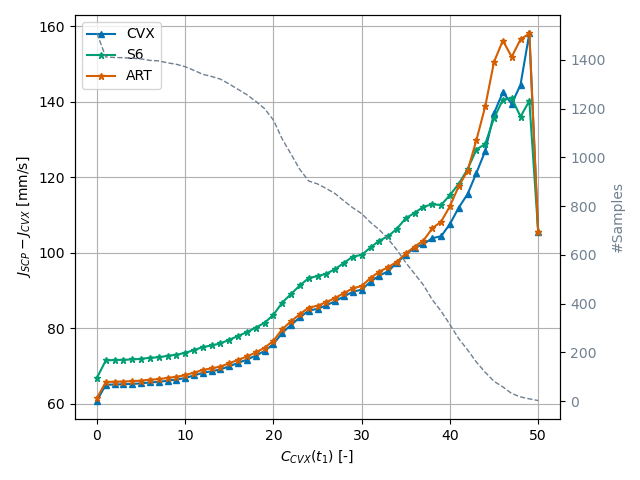

In [21]:
#%matplotlib ipympl
plt.style.use('seaborn-v0_8-colorblind')

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'$J_{SCP} - J_{CVX}$ [mm/s]', color='k')
ax1.plot(ctgs_range, J_relgain_scp_cvx_mean_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, J_relgain_scp_DT_mean_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, J_relgain_scp_S6_mean_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
# plt.hlines(0, 0, 51, linestyle='--', color='k')
# plt.ylim([-0.01, 0.01])
plt.legend(loc='best')
plt.grid(True)
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/optimality_2axis_plot_il.png', dpi=600)


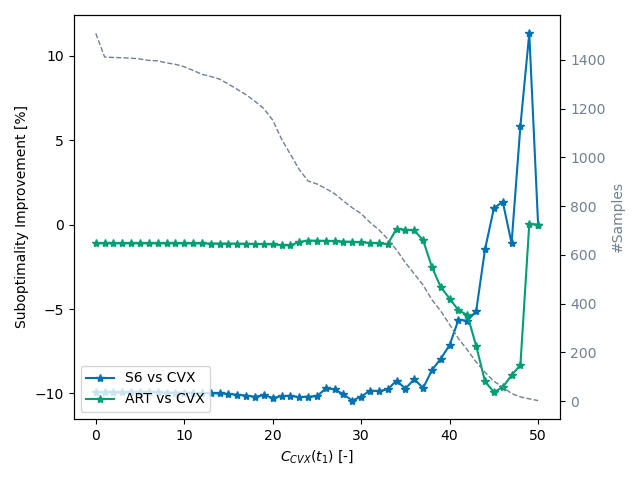

In [22]:

fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Suboptimality Improvement [%]', color='k')
if rl:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='S6 vs CVX')
    ax1.plot(ctgs_range, J_percgain_scp_DT_mean_ctgs*100., marker='*', label='ART vs CVX')
else:
    ax1.plot(ctgs_range, J_percgain_scp_S6_mean_ctgs*100., marker='*', label='ART-IL vs CVX')
ax1.tick_params(axis='y', labelcolor=color)
if rl:
    plt.legend(loc='lower left')
else:
    plt.legend(loc='lower left')
ax2 = ax1.twinx() 
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/perc_optimality_2axis_plot_il.png', dpi=600)




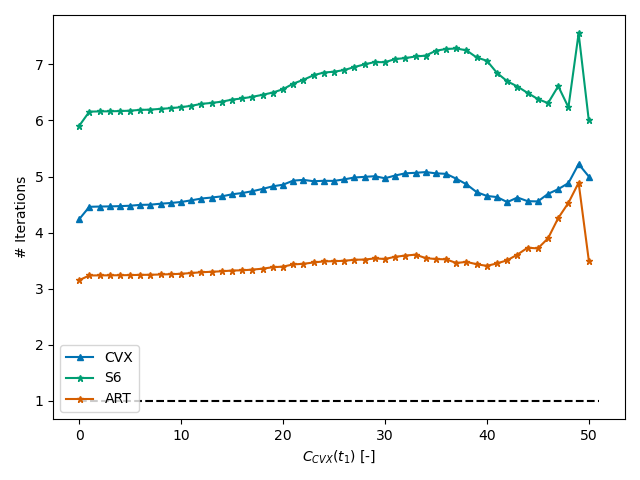

In [23]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'# Iterations', color='k')
ax1.plot(ctgs_range, iter_scp_mean_cvx_ctgs, marker='^', markersize=5, label='CVX')
if rl:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='S6')
    ax1.plot(ctgs_range, iter_scp_mean_DT_ctgs, marker='*', markersize=5,  label='ART')
else:
    ax1.plot(ctgs_range, iter_scp_mean_S6_ctgs, marker='*', markersize=5,  label='ART-IL')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(1, 0, 51, linestyle='--', color='k')
plt.legend(loc='lower left')
# ax2 = ax1.twinx() 
# color = 'slategray'
# ax2.set_ylabel('#Samples', color=color)
# ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/iterations_2axis_plot_il.png', dpi=600)



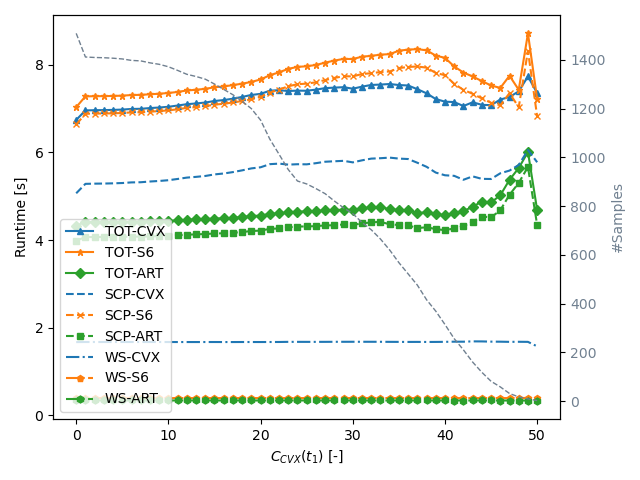

In [24]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Runtime [s]', color='k')

# Assign different markers and colors
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs, marker='^', markersize=5, color='#1f77b4', label='TOT-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_tot_ctgs, marker='D', markersize=5, color='#2ca02c', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_tot_ctgs, marker='*', markersize=5, color='#ff7f0e', label='TOT-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_scp_ctgs, linestyle='--', color='#1f77b4', label='SCP-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--',color='#ff7f0e', marker='x', markersize=5, label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_scp_ctgs, linestyle='--', color='#2ca02c', marker='s', markersize=5, label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='x', markersize=5, label='SCP-ART-IL')

ax1.plot(ctgs_range, runtime_mean_cvx_ctgs, linestyle='-.', color='#1f77b4', label='WS-CVX')
if rl:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='#ff7f0e', marker='p', markersize=5, label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_DT_ctgs, linestyle='-.', color='#2ca02c', marker='h', markersize=5, label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='p', markersize=5, label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor='k')
plt.legend(loc='lower left')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/runtime_2axis_plot_il.png', dpi=600)


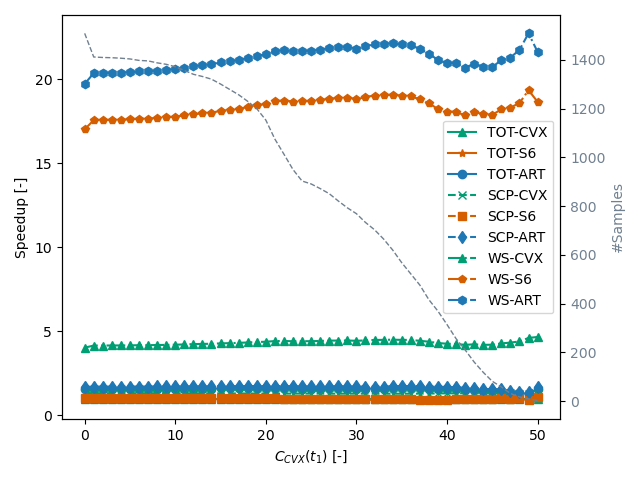

In [25]:
fig, ax1 = plt.subplots()
color = 'black'
ax1.set_xlabel(r'$C_{CVX}(t_1)$ [-]')
ax1.set_ylabel(r'Speedup [-]', color='k')

# CVX Type - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_tot_ctgs, linestyle='-', marker='^', color='#009E73', label='TOT-CVX')

# S6 Type - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_tot_ctgs, linestyle='-', marker='o', color='#1f77b4', label='TOT-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_tot_ctgs, linestyle='-', marker='*', color='#D55E00', label='TOT-ART-IL')

# SCP-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_scp_ctgs, linestyle='--', color='#009E73', marker='x', label='SCP-CVX')

# SCP-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='s', label='SCP-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_scp_ctgs, linestyle='--', color='#1f77b4', marker='d', label='SCP-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_scp_ctgs, linestyle='--', color='#D55E00', marker='*', label='SCP-ART-IL')

# WS-CVX - Greenish color with triangle marker
ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_cvx_ctgs, linestyle='-.', color='#009E73', marker='^', label='WS-CVX')

# WS-S6 - Orange color with star marker
if rl:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='#D55E00', marker='p', label='WS-S6')
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_DT_ctgs, linestyle='-.', color='#1f77b4', marker='h', label='WS-ART')
else:
    ax1.plot(ctgs_range, runtime_mean_cvx_tot_ctgs/runtime_mean_S6_ctgs, linestyle='-.', color='orangered', marker='s', label='WS-ART-IL')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='best')

ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('#Samples', color=color)
ax2.plot(ctgs_range, test_dataset_size, color=color, linestyle='--', linewidth=1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

if save_plots:
    if rl:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_rl.png', dpi=600)
    else:
        plt.savefig(root_folder + '/optimization/saved_files/plots/speedup_2axis_plot_il.png', dpi=600)
